In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
# Read in the california housing data set
california_data = pd.read_csv('../Resources/California_Housing.csv')
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


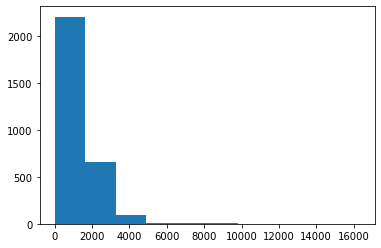

1387.9633333333334
1152.5
0    1128.0
dtype: float64


In [3]:
# Plot a histogram and Determine if the house age in California is normally distributed
plt.hist(california_data['Population'])
plt.show()
print(california_data['Population'].mean())
print(california_data['Population'].median())
print(california_data['Population'].mode())

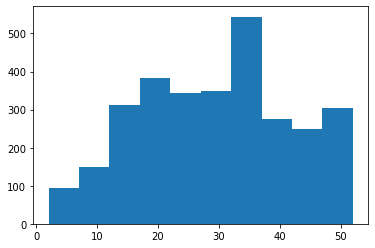

NormaltestResult(statistic=21.720923946046174, pvalue=1.920265565706536e-05)


In [9]:
# PLot a histogram and then
# Determine which measure of central tendency i.e. mean,median or mode 
# is most appropriate to describe the Population -
# Median is the recomended one.

plt.hist(california_data['HouseAge'])
plt.show()
print(sts.normaltest(california_data['HouseAge'].sample(100)))


In [5]:
# Determine if there are any potential outliers in the average occupancy in California
qtr = california_data['AveOccup'].quantile([.25,.5,.75])
low_q = qtr[0.25]
upper_q = qtr[0.75]
iqr = upper_q-low_q

print(f"The - IQR-  interquartile range is: {iqr}")

low_bound = low_q - (1.5*iqr)
up_bound = upper_q + (1.5*iqr)

print(f"The lower bound is: {low_bound}")
print(f"The upper bound is: {up_bound}")

outliers = california_data.loc[(california_data['AveOccup']<low_bound)
                   |(california_data['AveOccup']>up_bound)]

print(outliers)


The - IQR-  interquartile range is: 0.8723682937387878
The lower bound is: 1.116538539995866
The upper bound is: 4.606011714951017
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
4     4.0156      35.0  6.195312   1.171875       669.0  5.226562     33.93   
42    3.6429      26.0  5.836111   1.083333      2171.0  6.030556     38.57   
72    2.7759      30.0  4.167619   1.059048      2727.0  5.194286     33.83   
143   3.0509      30.0  5.598131   1.172897      1019.0  4.761682     33.94   
168   2.6300      29.0  3.496212   1.003788      2576.0  4.878788     33.97   
...      ...       ...       ...        ...         ...       ...       ...   
2793  2.5556      11.0  5.825112   1.255605      1158.0  5.192825     34.96   
2849  9.8892      40.0  8.244019   0.995215       976.0  4.669856     37.46   
2907  4.8750       5.0  7.101721   1.176056      7694.0  6.020344     34.69   
2919  1.6150      42.0  4.824000   1.216000      1167.0  4.668000     33.96   


In [6]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(outliers['MedInc'].min())
print(outliers['MedInc'].max())

0.716
15.0001


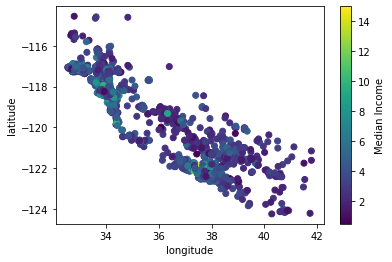

In [7]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, 
#color the data points using the median income of the block.

plt.scatter(california_data['Latitude'],california_data['Longitude'], c= california_data['MedInc'])

clb = plt.colorbar()

plt.xlabel("longitude")
plt.ylabel("latitude")
clb.set_label("Median Income")
plt.show()